<div style="background-color:#f07092; text-align:center; vertical-align: middle; padding:40px 0; color:#F7F7FF; border-radius:1em">

<h1>🤖Welcome</h1>

</div>

# 💬 介绍  
<p style="font-size:16px ">这个数据分析项目旨在探究如何在抖音上增加粉丝，以及增加粉丝时需要关注哪些指标和对热门视频的潜在因素进行分析。该项目主要分为两个部分：探索式数据分析和基本线性回归。在项目的最后，对于如何成为一名受欢迎的抖音达人和如何给出了建议，并对项目进行了总结。</p>  
<p style="font-size:16px">本项目的第一部分是围绕参与度进行的探索性数据分析，探究了参与度与粉丝数量和视频流行度之间的关系，该指标用于衡量与受众规模相比的内容互动量。通过对视频数据集的分析，本项目发现粉丝数与参与度之间存在基本关系，但它们之间的关系受多种因素的影响，需根据实际情况和目的使用这个指标。通过对高参与度和高粉丝的用户进行了数据分析，对数据进行聚合，计算和可视化，呈现了这两类群体在创作者人数、视频产量分布和总计上的差异和特征。然后探究了人气前十的创作者的视频标签与其参与度的关系。最后，对关于如何在TikTok上获得更多粉丝和更多参与度给出了建议。</p>

<p style="font-size:16px">项目的第二部分使用线性回归模型来探索各个因变量与目标变量之间的关系。在进行模型拟合之前，对数据进行了预处理，包括将离散字符量转换为离散数值量，通过可视化热图的方式检查变量是否存在缺失值等。然后通过绘制聚类图来初步了解各自变量与因变量之间的相关性关系，例如“点赞数”和“播放数”之间有很强的正相关关系，而“分享数”和“点赞数”、“播放数”之间则存在中等程度的正相关关系等，并对结果所表示的意义进行了说明。接着，通过混合可视化的方法，将直方图和散点图结合起来，便于观察变量的整体分布趋势和聚集程度和直方图无法体现的局部聚集分布趋势。最后拟合模型来确定各自变量对因变量的影响，对得出的结论进行解释，列出了模型的不足和改进建议。</p>
  
  




# 🎯研究目的
这个项目旨在研究以下内容：
- 如何成为受欢迎的 TikTok 用户，如何增加 TikTok 上的粉丝数量
- 在寻求增加 TikTok 粉丝数量的方法时，需要关注哪些指标
- 分析视频受欢迎的潜在因素，研究如何创作受欢迎的 TikTok 视频




<div>
<div style="float:right; width:33.3%; background-color:#f07092; height:50px"></div>
<div style="float:left; width:33.3%; background-color:#09101F; height:50px"></div>
<div style="float:left; width:33.3%; background-color:#537FE7; height:50px"></div>
<div style="float:right; width:33.3%; background-color:#FCE22A; height:50px"></div>
<div style="float:right; width:33.3%; background-color:#CDE990; height:50px"></div>
<div style="float:right; width:33.3%; background-color:#84D2C5; height:50px"></div>
</div>

## 数据导入

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# Set matplotlib to display graphs inline
%matplotlib inline  

In [2]:
# Define file paths
TIKTOKER_PATH = 'dataset_free-tiktok-scraper_2022-07-27_21-44-20-266.xlsx'

# Read the TikTok data from excel file into a dataframe
df_tiktok = pd.read_excel(TIKTOKER_PATH)

# Select only necessary columns for analysis
data = df_tiktok[[
    'authorMeta/name', 'authorMeta/fans', 'diggCount',
    'commentCount', 'playCount', 'shareCount', 'videoMeta/duration', 'id',
    'searchHashtag/name', 'searchHashtag/views']]

选择这些数据主要涉及三个方面的考量：评估视频表现的指标包括点赞数、评论数、分享数和播放数等多个维度，另外，影响视频流行度的因素可能有多种，其中一部分可能来自于创作者本身的影响力，另一部分则与视频所带的标签有关。初步假设是，播放量较高的标签可能代表用户更倾向于观看该类型的视频，反向预测则是创作者选择这些标签可以增加他们视频的曝光度。此外，视频的时长也可能影响其流行度。考虑到创作者所属时区可能不同，数据集并未提供创作者的地区信息，因此将视频发布时间纳入播放量的影响因素并不会提供有效的参考，反而可能干扰数据分析的结果，所以这里没有选择“创建时间ISO”。

检查一下作为唯一标识符的Videoid和Authorid是否存在空值

In [3]:
# Print total rows and non-null id and author counts
print('Total rows:', len(data))
print("Videoid(非空行数):", pd.value_counts(data['id'].notna())[0])
print("Authorid(非空行数):", pd.value_counts(data['authorMeta/name'].notna())[0])

Total rows: 1200
Videoid(非空行数): 1200
Authorid(非空行数): 1200


<h1 style="text-align:center">↗️<i style="background-color:#FCE22A">Exploratory</i><i style="background-color:#537FE7"> Data Analysis</i></h1>
<h1 style="text-align:center">探索式数据分析</h1>

<h2 style="text-align:center"> 📝Engagement Rate </h2>

<mark style="background-color:#FCE22A">参与度（Engagement Rate）</mark>，又称互动率，是一种社交媒体营销指标，用于衡量一段内容（或活动，或整个帐户）与覆盖面或关注者或受众规模进行比较的互动量。
参与度指标，例如点赞和评论数，可以对评估社交媒体表现提供重要的参考。在影响营销媒体包或者评估社交活动的投资回报率时，参与度通常被用作一项卖点。  
（这里我将参与度作为我的探索式数据分析部分的核心指标，为避免术语混淆，下文也都用参与度来表示engagement rate）

由于这个数据集没有提供创作者个人的详细数据，这里我计算的是单个视频的参与度。  
我使用以下公式来检查特定视频在观众中产生的互动程度和兴趣:  

<div style="text-align: center;">
<br>
<strong> (点赞数 + 评论数 + 分享数) / 粉丝数) * 100</strong>
</div>

> 参与度计算公式的参考网址在这里: [**TikTok engagement rates**](https://blog.hootsuite.com/tiktok-analytics/)  

在计算参与度之前，先对数据进行去重和整理

In [4]:
# Drop duplicate rows based on video id, rename id column and set it as index
data_cleaned = data.drop_duplicates(subset=['id']).copy()
data_cleaned.rename(columns={'id': 'Videoid'}, inplace=True)
data_cleaned.set_index('Videoid', inplace=True)

# Calculate engagement rate and add it as a new column in the dataframe
engagement = ((data_cleaned['diggCount'] + data_cleaned['commentCount']
              + data_cleaned['shareCount']) / data_cleaned['authorMeta/fans']) * 100
data_cleaned['engagement'] = engagement

In [5]:
# Reorder columns
data_cleaned.insert(2,'engagement',data_cleaned.pop('engagement'))

print("The range of engagement rate: " +
      f"from {(data_cleaned['engagement'].min()):.4f} " +
      f"to {(data_cleaned['engagement'].max()):.4f}")
data_cleaned.head()

The range of engagement rate: from 0.4642 to 80897.9592


,authorMeta/name,authorMeta/fans,engagement,diggCount,commentCount,playCount,shareCount,videoMeta/duration,searchHashtag/name,searchHashtag/views
Videoid,,,,,,,,,,
6797294685082619137,miso_ara,13200000,149.573485,19300000,66000,200600000,377700,17,meme,556B
6958603581675031814,crinka11,1300000,1212.269231,15400000,154100,79600000,205400,11,meme,556B
7083862667613490474,iampets_com,696800,2049.124569,13900000,55300,106100000,323000,25,meme,556B
7096466682046188805,dailydosevideos_,510200,2607.604861,13100000,70600,72500000,133400,62,meme,556B
6815382456242326789,jakeypoov,3300000,405.709091,13100000,35500,62700000,252900,36,meme,556B


<h2 style="text-align:center">🦋好的，让我们开始可视化吧！</h2>

首先，先来看下参与度与粉丝数之间的关系

In [6]:
import matplotlib.font_manager as fm
# check whether Heiti is available in system
[f for f in fm.fontManager.ttflist if 'Heiti' in f.name] 
mpl.rc('font', family='Heiti TC')

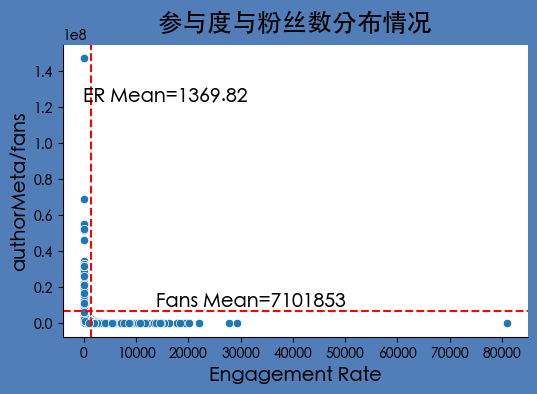

In [7]:
# Create a scatter plot of engagement vs fans
bg = plt.figure(figsize=(6,4))
fig = sns.scatterplot(data_cleaned, y='authorMeta/fans', x='engagement')

# Add mean lines and labels to the plot
avg_eg = np.mean(data_cleaned['engagement'])
avg_fans = np.mean(data_cleaned['authorMeta/fans'])
plt.axvline(x=avg_eg, ls='--', c='r')
plt.axhline(y=avg_fans, ls='--', c='r')
plt.text(x=0.22, y=0.8, s=f"ER Mean={avg_eg:.2f}", ha='center', size=14, transform=plt.gca().transAxes)
plt.text(x=0.2, y=0.1, s=f"Fans Mean={avg_fans:.7g}", ha='left', size=14, transform=plt.gca().transAxes)

# Format plot
sns.set_style("darkgrid")
fig.set_title('参与度与粉丝数分布情况', fontsize=18, pad=10)
fig.set_xlabel('Engagement Rate',fontsize=14)
fig.set_ylabel(fig.get_ylabel(), fontsize=14) 
bg.subplots_adjust(bottom=0.15)
bg.set_facecolor('#517eb9')
sns.despine()

<h3>🕵从图中可以发现什么</h3>

1. 红线划分的左上部分，都是具有百万数量级粉丝的创作者视频，然而它们的参与度都没有达到平均值；右下部分正好相反，异常高参与度的创作者群体都没能达到粉丝数的均值；从公式来看，粉丝基数对参与度的结果是有比较大的影响的。  


2. 根据公式，分母（粉丝数）代表创作者在该平台上的影响力，右下部分反映出，对于参与度高的视频来说，该视频的点赞数、评论数和分享数等参与度指标可能超出了其当前粉丝数所应得的预期值。  

这个图像的局限之处在于，由于异常点的存在，大部分数据都重叠在了一起，无法判断区间的密集程度，但是它揭示了粉丝数与参与度的基本关系  
</div>

<br></br>
*让我们进一步观察一下高参与度和高粉丝两个群体*

接下来，我们将专注于高参与度和高粉丝两个群体的数据细节，以更深入地了解它们之间的关系。  
我想对高参与度和高粉丝的用户进行数据分析，并对数据进行聚合和总结，以了解这两类群体的创作者人数、视频数量以及总计。

### 🧑‍💻为了分析两个群体，对数据进行了提取，重组和计算，具体表现为：
- 根据数据中的平均参与度和平均粉丝数，创建了两个子数据集，一个包含高参与度用户的数据，另一个包含高粉丝用户的数据。  


- 对这两个数据集进行处理，添加了一个名为“VideoCount”的新列，并计算了每个创作者的视频数量    
  
  
- 将两个数据集合并成一个，并对数据进行聚合和总结  


最终的表格（sum_sub）共有4列数据： 一列是群体（Group），表示创作者所属的群体；一列是视频数（VideoCount），表示创作者的视频数量，一列是该视频数下的创作者数量（AuthorCount），另一列是每个视频数下的视频总数（VideoTotal）。

In [8]:
# Create subsets of the data for high engagement and high fans
high_eg = data_cleaned[(data_cleaned['engagement']>avg_eg) ].copy(deep=True)
high_fans = data_cleaned[(data_cleaned['authorMeta/fans']>avg_fans)].copy(deep=True)
high_fans['VideoCount'] = high_fans['authorMeta/name'].map(high_fans['authorMeta/name'].value_counts())
high_eg['VideoCount'] = high_eg['authorMeta/name'].map(high_eg['authorMeta/name'].value_counts())

# Combine the subsets
sub_1 = high_fans[['authorMeta/name', 'authorMeta/fans', 'VideoCount']].copy()#.set_index('VideoCount')
sub_1['Group'] = 'Popular TikTokers'

sub_2 = high_eg[['authorMeta/name', 'authorMeta/fans', 'VideoCount']].copy()#.set_index('VideoCount')
sub_2['Group'] = 'High ER TikTokers'

sub = pd.concat([sub_1,sub_2])

# Summarize and aggregate the data
sum_sub = sub.groupby(['Group', 'VideoCount'])['authorMeta/name'].count().reset_index(name='VideoTotal')
sum_sub['AuthorCount'] = sum_sub.apply(lambda row: int(row['VideoTotal'] / row['VideoCount']), axis=1)

In [9]:
# export aggregated df to csv
# sum_sub.to_csv('High-ER_and_High-Fans_group_data') # uncomment if u want to export the table
sum_sub

,Group,VideoCount,VideoTotal,AuthorCount
0,High ER TikTokers,1,253,253
1,High ER TikTokers,2,2,1
2,Popular TikTokers,1,63,63
3,Popular TikTokers,2,34,17
4,Popular TikTokers,3,18,6
5,Popular TikTokers,4,20,5
6,Popular TikTokers,5,15,3
7,Popular TikTokers,6,6,1
8,Popular TikTokers,8,8,1
9,Popular TikTokers,14,14,1


接下来，我们将对数据进行可视化，以便了解不同群体的创作者视频数量分布情况，比较这些群体之间的视频数量和作者数量的差异，以及探索这些差异可能产生的影响。

In [10]:
def add_barhplot_annotation(barhplot):
    # Add labels to the horizontal bars
    for i, bar in enumerate(subchart.containers):
        for rect in bar:
            width = rect.get_width()
            height = rect.get_height()
            subchart.text(rect.get_x() + width / 2, rect.get_y() + height / 2,
                          f"{width:.0f}", ha='center', va='center', color='black')

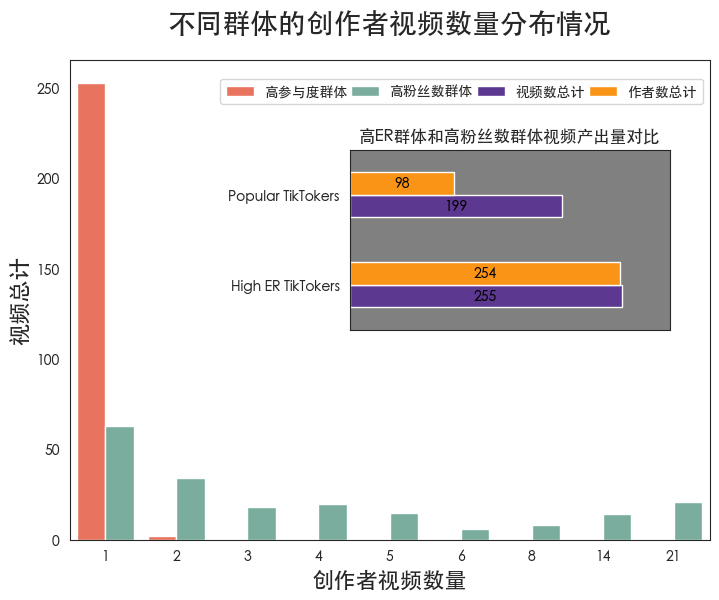

In [40]:
mpl.rc('font', family='Heiti TC') # uncomment if u encounter missing font error
# Create a bar chart of video count vs group, and a horizontal bar chart of video and author count
color_dict = {'High ER TikTokers':'tomato', 'Popular TikTokers':'#71b6a1'}
fig  = plt.figure(figsize=(8,6))

# Add a main axes to the figure
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
chart = sns.barplot(data=sum_sub, x='VideoCount', y='VideoTotal', hue='Group', estimator=sum,
            palette=color_dict, dodge=0.8)
axes1.set_xlabel('创作者视频数量', fontsize=16)
axes1.set_ylabel('视频总计', fontsize=16)
axes1.set_title('不同群体的创作者视频数量分布情况', fontsize=20, pad=20)


# Add the second set of axes for the horizontal bar plot
axes2 = fig.add_axes([0.45, 0.45, 0.4, 0.3], facecolor='grey')
selection = sum_sub.drop(labels='VideoCount', axis=1).groupby('Group').sum()
subchart = selection.plot(kind='barh', stacked=False, color=['#5D3891', '#F99417'], ax=axes2)

add_barhplot_annotation(subchart)
axes2.set(xlim=[0, 300], xticklabels=[], ylabel='', title='高ER群体和高粉丝数群体视频产出量对比')
x_label = axes2.get_yticklabels()


# Combine the two legends into one
handles1, labels1 = axes1.get_legend_handles_labels()
handles2, labels2 = axes2.get_legend_handles_labels()
fig.legend(handles1 + handles2, ['高参与度群体', '高粉丝数群体', '视频数总计','作者数总计'], loc='upper right', ncol=4, 
           bbox_to_anchor=(0.9, 0.88), columnspacing=0.25)
axes1.legend_.remove()
axes2.legend_.remove()


sns.set_style('white')

<h3>🔍 通过分析可视化数据，我们可以发现：</h3>

- 高参与度的创作者基本上只有一个视频，而部分高粉丝的创作者则有多个视频。  
- 从小图来看，高参与度创作者的数量与总视频产出基本一致，平均每位创作者只产出了一部视频。而高粉丝创作者的总视频产出远大于创作者总数，平均每位创作者产出了两部以上的视频。两类群体在平均视频产量上差距明显。这意味着，高粉丝群体中的创作者往往更加活跃，发布更多的视频。


<h2 style="text-align:center">🎵TikTok上最具人气的创作者是?</h2>

##### 围绕参与度，查看Top10创作者的参与度分布情况
我们将分析数据，了解以下信息：

1. 抖音前十最具人气创作者
2. 人气创作者们的垂直领域



In [12]:
# return关注人数最多的前十位Tiktoker的list
list_ttkers = data_cleaned.groupby('authorMeta/name').describe().sort_values(
    ('authorMeta/fans','mean'),ascending=False)['authorMeta/fans'].index[0:10].tolist()
top_tiktokers = data_cleaned.loc[data_cleaned['authorMeta/name'].isin(list_ttkers)]

In [13]:
data_cleaned.groupby('authorMeta/name').describe().sort_values(('authorMeta/fans','mean'),
    ascending=False)['authorMeta/fans'].iloc[0:10,1].to_frame().rename(columns={'mean': 'Followers'})

,Followers
authorMeta/name,
khaby.lame,147500000.0
zachking,69100000.0
spencerx,55000000.0
jasonderulo,52500000.0
bts_official_bighit,52100000.0
ox_zung,46500000.0
thekiryalife,34800000.0
spider_slack,34000000.0
gordonramsayofficial,33200000.0


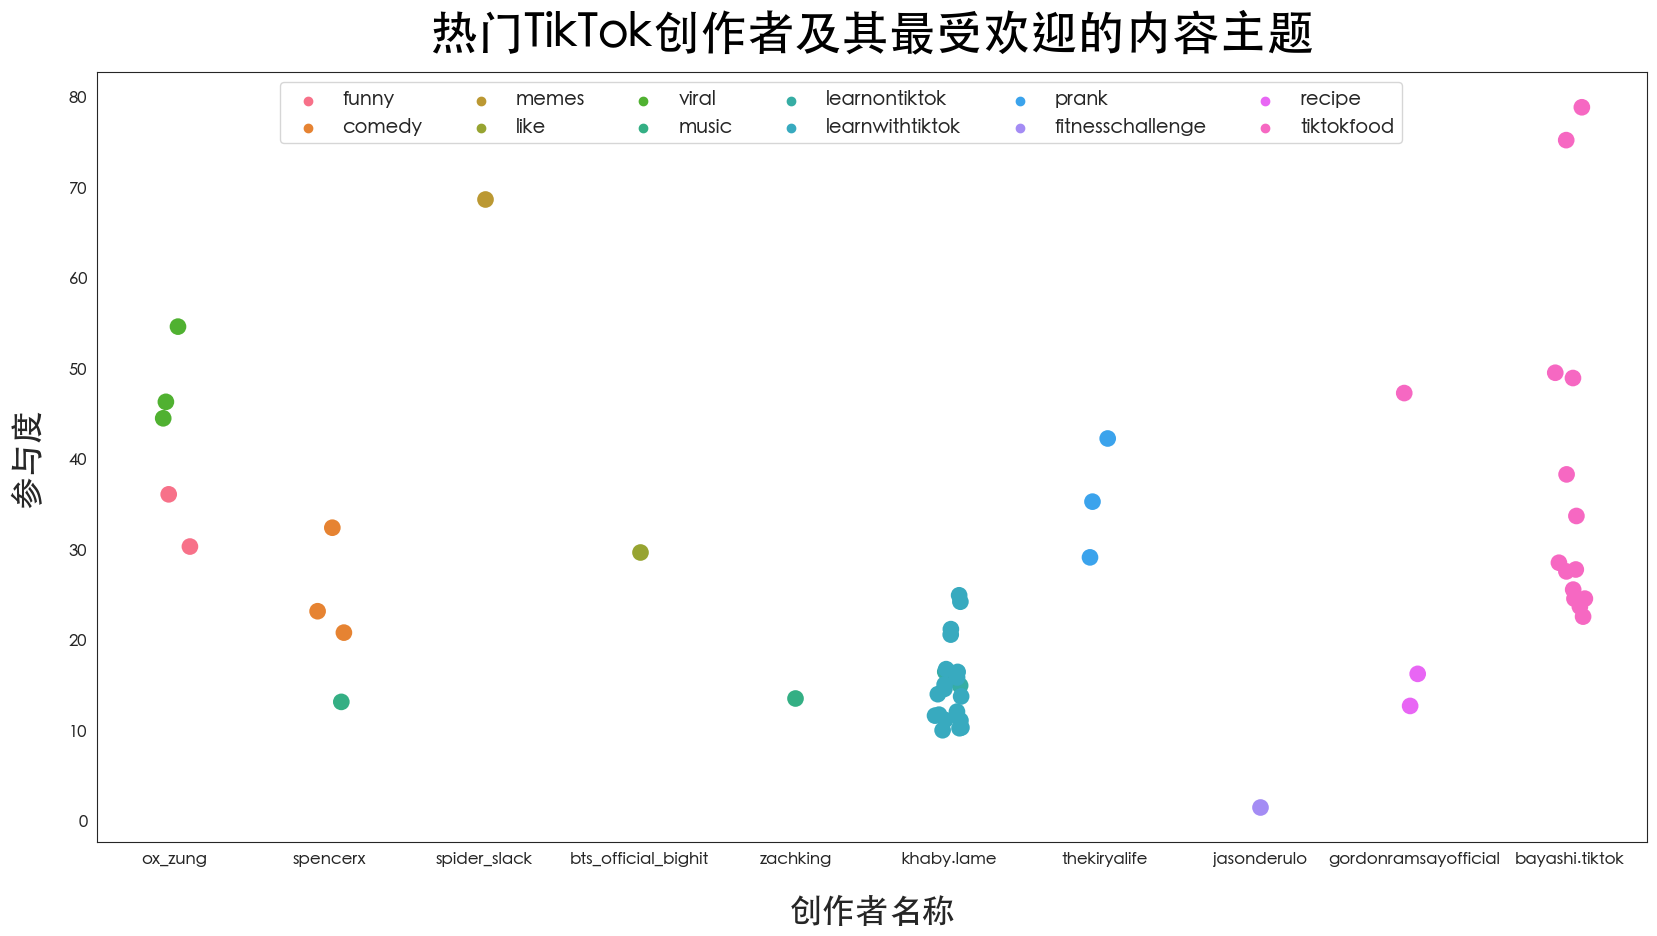

In [14]:
mpl.rc('font', family='Heiti TC')
plt.figure(figsize=(20,10))

fig = sns.stripplot(data=top_tiktokers, x='authorMeta/name', y='engagement', 
                    hue='searchHashtag/name', jitter=True, size=12, palette='husl')
fig.set_ylabel('参与度', fontsize=24, labelpad=20)
fig.set_xlabel('创作者名称', fontsize=24, labelpad=20)
fig.set_title("热门TikTok创作者及其最受欢迎的内容主题", y=1.02, fontsize=34, 
              fontweight='bold', color='black')
fig.tick_params(axis='both', labelsize=12)
fig.legend(ncol=6, bbox_to_anchor=(0.48, 1),loc='upper center', fontsize=14,framealpha=0.8)

 根据图表显示，这些受欢迎的创作者拥有各自不同的运营策略。一部分创作者专注于深耕自己擅长的领域，不断优化视频内容和提升质量；一部分则拥有不止一种擅长的类型；有的创作者会尝试挑战新的视频类型；另一些通过定期或频繁发布来维系粉丝关系。此外，有的创作者或许仅仅因为拥有众多粉丝而任性地发视频（这里并没有特指BTS🤣）。


<h2>💡 Take Away:</h2>
<br>
<div style="padding:20px 20px;  border: 4px solid #537FE7;">

<p>&emsp;&emsp;通过分析自己的视频类型和观众互动数据，我们可以了解自己的优势和粉丝需求。结合参考度公式，比如个人的平均参与度（ER），我们可以评估自己的视频表现和潜力，结合自己目前所处的阶段（新手、小有成就还是大V），找到适合自己的视频发布策略。</p>
<p>&emsp;&emsp;在起步期或上升期，异常参考度的视频预示着潜力视频，这可以为创作者提供一个参考方向，帮助他们确定未来视频类型的方向；或通过探索新的视频类型，试探观看者的反应；利用高参考度的视频增加互动，通过回复等方式积极增加粉丝互动，也是提高影响力的重要策略之一。</p>
</div>

<br>
</br>
<br>
</br>

<h1 style="text-align:center">📉<i style="background-color:#FCE22A">Linear Reg</i><i style="background-color:#537FE7">ression Model</i></h1>
<h1 style="text-align:center">线性回归模型</h1>

<h2>⌨️预处理</h2>

在使用模型之前，我们需要对数据进行一些预处理，以确保模型能够正确地使用数据: 

1. 将离散字符量（searchHashtag/views）转成离散数值量（tagViews）

2. 查看变量中是否有缺失值


In [15]:
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

标签浏览量的数据类型是字符串，并以百万和亿为计量单位。然而，线性回归模型处理的是数值型数据。因此，我们需要将标签浏览量转换为数值类型。

In [16]:
# Convert 'searchHashtag/views' column to a numeric 'tagViews' column
def convert_to_number(value):
    if value.endswith("M"):
        return np.float64(value.replace("M", "")) * 1e6
    elif value.endswith("B"):
        return np.float64(value.replace("B", "")) * 1e9


In [17]:
data_cleaned['tagViews'] = data_cleaned['searchHashtag/views'].apply(convert_to_number)

然后导入我们需要的指标

In [18]:
# Select independent variables X and dependent variable y
X = data_cleaned[['authorMeta/fans', 'tagViews', 'videoMeta/duration','shareCount','diggCount']]
y = data_cleaned[['playCount']]

在进行可视化和拟合模型前，需要先检查各项指标是否存在空值，为了更有趣和直观一点，我使用热图将这些空值可视化。

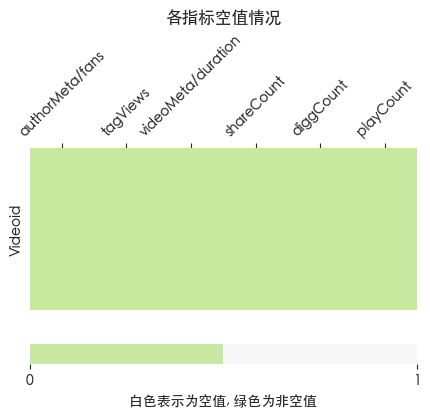

In [19]:
mpl.rc('font', family='Heiti TC') # uncomment if u encounter missing font error
fig, ax = plt.subplots(figsize=(5,3))
color_map = [plt.get_cmap("PiYG", 7)(4),plt.get_cmap("PiYG", 7)(3)]
sns.heatmap(X.assign(playCount = y.iloc[:,0]).isnull(),yticklabels=False, 
            cbar_kws={'label': '白色表示为空值, 绿色为非空值', 'orientation': 'horizontal', 'ticks': [0, 1], 'format': '%.0f'}, 
            cmap=color_map, vmin=0, vmax=1)
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation=45)
ax.set_title('各指标空值情况');

可以看到数据是比较完整的，各指标并没有空值出现。

那么，接下来就进入正题吧！

<h2 style="text-align:center">📊数据集特征和关系</h2>  

<br>
在跑模型之前，需要先大致了解一下数据集的特征，数据是一个什么样的分布，离散程度，数据间关系等等，以便在拟合模型前确定是否需要去异常点，是否需要变换，标准化归一化等等。

先来看下数据集的特征和关系，我们将探索两个方面：
1. 自变量和因变量间的关系  
  
2. 各变量的分布

用clustermap将各维度按相关性进行排序

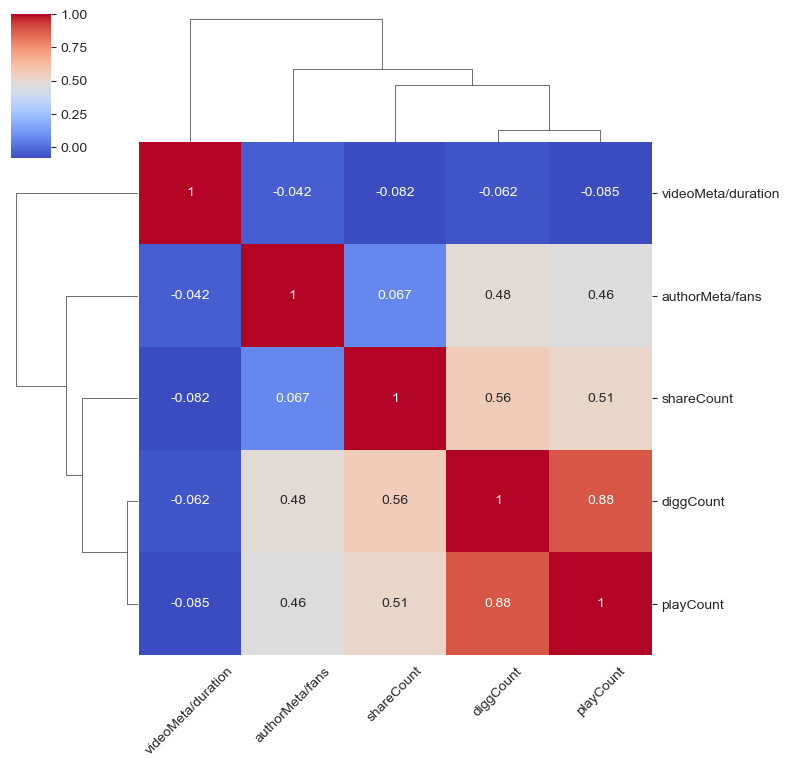

In [49]:
g = sns.clustermap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm', figsize=(8,8))
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(),rotation=45);

**🔎从聚类图中，相关性分析结果如下：**

- <span style="background-color: #CDE990">点赞数和播放数</span>之间有很强的正相关关系（r = 0.883）：这表明视频在平台上被“点赞”（喜欢）的次数与视频被播放的次数密切相关。  
  
  
- <span style="background-color: #CDE990">分享数</span>和<span style="background-color: #FCE22A">点赞数</span>r = 0.561）以及<span style="background-color: #FCE22A">播放数</span>（r = 0.513）之间有中等程度的正相关关系。这表明更经常被分享的视频也更有可能被用户“点赞”。更经常被分享的视频也更有可能被播放更多次。  

    
- <span style="background-color: #CDE990">标签浏览量</span>和<span style="background-color: #FCE22A">点赞数</span>（r = 0.507）以及<span style="background-color: #FCE22A">播放数</span>（r = 0.486）之间有较弱的正相关关系。这表明，标签浏览量与视频的点赞数和播放数之间存在一定程度的相关关系，但它并不是视频受欢迎和播放量高的主要决定因素之一。  


- <span style="background-color: #CDE990">视频时长</span>和<span style="background-color: #FCE22A">播放数</span>（r = -0.085）以及<span style="background-color: #FCE22A">分享数</span>（r = -0.082）之间有较弱的负相关关系。这表明更长的视频不太可能被播放更多次和分享。


In [21]:
for i, col in enumerate(pd.concat([X,y],axis=1)):
    if col == 'playCount':
        print(f"\nThe skewness of {pd.concat([X,y],axis=1).columns[i]} is {skew(pd.concat([X,y],axis=1).iloc[:, i])}")
    else:
        print(f'The skewness of {pd.concat([X,y],axis=1).columns[i]} is {skew(pd.concat([X,y],axis=1).iloc[:, i])}')

The skewness of authorMeta/fans is 5.630776533176443
The skewness of tagViews is 6.052560046575889
The skewness of videoMeta/duration is 3.739741127646074
The skewness of shareCount is 4.195272660294478
The skewness of diggCount is 1.54425896181884

The skewness of playCount is 2.1170624817636226


> ⚠️注意，有些指标的偏度较大，这可能会对模型的拟合和预测产生一定的影响

In [22]:
def histplot(x, ax, main_color="#72DDF7", second_color='grey', bins=40):
    
    sns.histplot(x=x, bins=bins, ax=ax,
                 kde=True, color=main_color,
                 edgecolor=second_color, line_kws={"linestyle":'--'}, linewidth=1,
                 kde_kws=dict(cut=1)
                )
    ax.lines[0].set_color(second_color)
    ax.set_ylabel("")

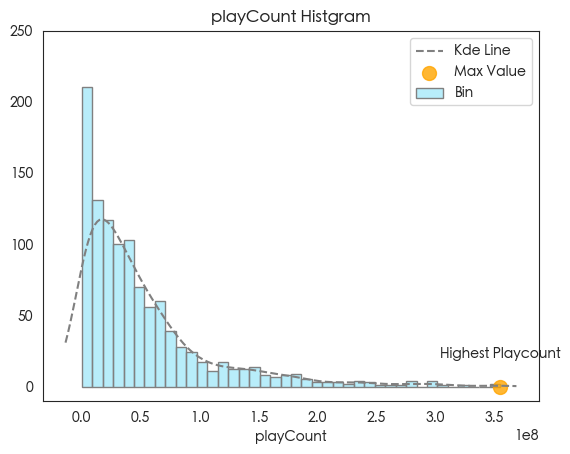

In [23]:
fig,ax = plt.subplots()
histplot(x=y.iloc[:, 0], ax=ax)

x_max = y.max()
y_5_indices = np.argsort(-y.iloc[:, 0].values)[:95]

plt.scatter([x_max], [0], s=100, c='orange', alpha=0.8)
plt.annotate('Highest Playcount', (x_max, 0), textcoords="offset points", xytext=(0, 20), ha='center', fontsize=10)

ax.set_title('playCount Histgram')
ax.set_ylim(bottom=-10, top=250)
legend = plt.legend(['Kde Line', 'Max Value', 'Bin'], loc='upper right')

事先看了下，我发现有些自变量存在极端离群值，其最大值与大部分数据所处的范围相差甚远。为了更好地观察这些离群值的分布情况，我将数据列的前1%、3%和5%的数据分别用不同的颜色标注，以便观察这些异常值的聚集程度。

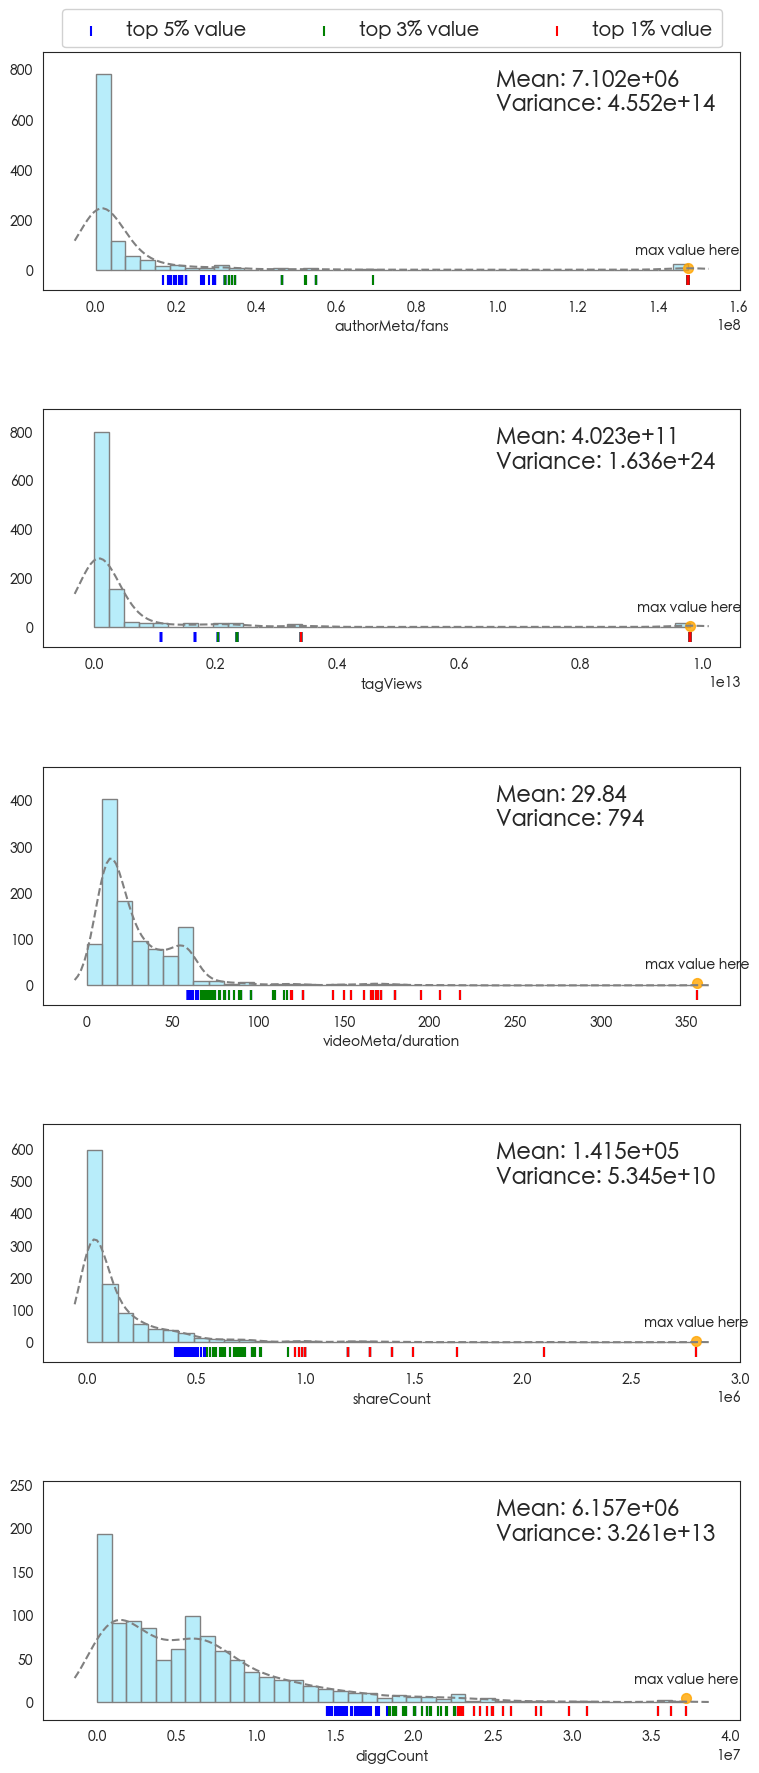

In [24]:
# Create subplots for each feature in X and plot histograms, statistics and top values
fig, axes = plt.subplots(5, 1, figsize=(9, 12))
for i in range(len(axes)):
    ax = axes[i]
    histplot(X.iloc[:, i], ax=ax)
    mean_fans = X.iloc[:, i].mean()
    var_fans = X.iloc[:, i].var()
    ax.text(x=0.65, y=0.75, fontsize=16,
            s=f"Mean: {mean_fans:.4g}\nVariance: {var_fans:.4g}", transform=ax.transAxes)

    x_max = X.iloc[:, i].max()
    ax.scatter([x_max], [5], s=50, c='orange', alpha=0.8)
    ax.annotate('max value here', (x_max, 5), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10)

    top_5_indices = np.argsort(-X.iloc[:, i].values)[:95]
    top_3_indices = np.argsort(-X.iloc[:, i].values)[:50]
    top_1_indices = np.argsort(-X.iloc[:, i].values)[:20]
    
    y_offset = (ax.get_ylim()[1]-ax.get_ylim()[0]) * 0.05
    scatter_5 = ax.scatter(X.iloc[top_5_indices, i], np.full_like(X.iloc[top_5_indices, i], -y_offset), marker='|',
                           color='blue', s=50)
    scatter_3 = ax.scatter(X.iloc[top_3_indices, i], np.full_like(X.iloc[top_3_indices, i], -y_offset), marker='|',
                           color='green', s=50)
    scatter_1 = ax.scatter(X.iloc[top_1_indices, i], np.full_like(X.iloc[top_1_indices, i], -y_offset), marker='|',
                           color='red', s=50)

    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]+50)


axes[0].legend([scatter_5, scatter_3, scatter_1],
               ['top 5% value', 'top 3% value', 'top 1% value'], loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3,
               frameon=True, framealpha=0.9, columnspacing=3, fontsize=14, borderpad=0.5)

plt.subplots_adjust(hspace=0.5, top=1.5)
plt.show()


从直方图和“毛毯式”散点图可以看出，这些指标的分布特征各不相同，这些特征与指标的自然属性密不可分。通过这些图表，能够分析的东西挺多的，例如，我们发现当前的创作者中存在几个大V垄断了粉丝数量，造成了数据的断层；而点赞数的异常值很可能来自于这些顶尖大V。又比如说，通过点赞数和分享数的分布特征，发现点赞对于观看视频的人来说阻力是比较小的，即相较于分享视频，观看者更容易点赞视频等等。但为了不使内容过于昂长，我们在这里不再深入分析了。

<a id="its-time-to-predict"><a/>
<h1 style="text-align:center">📈模型预测</h1>

📌 虽然变量都是一个正偏的分布，因为这次用的是线性回归拟合模型，所以没有对模型进行标准化，因为在查阅资料的时候看到[是否标准化对线性回归影响不大](https://blog.csdn.net/shwan_ma/article/details/80154888)，我也提前跑过，确实影响不大（结果我忘了🤦‍♀️），所以这里没有进行任何变换或是标准化归一化。

In [25]:
# Select independent variables X and dependent variable y
X = data_cleaned[['authorMeta/fans', 'tagViews', 'videoMeta/duration','shareCount','diggCount']]
y = data_cleaned[['playCount']]

In [26]:
# Split data into training and testing sets and fit linear regression models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

在计算P值和绘制Q-Q图时，sklearn库的lm模型并未提供相应的函数，因此我使用了statsmodel的ols模型来补充。为了确定使用statsmodel的ols模型来补充lm模型的适用性，我对比了使用sklearn库fit的模型和ols模型的系数，以了解它们之间的差异。

In [27]:
# Train the linear regression model
lm = LinearRegression(fit_intercept=True).fit(X_train, y_train)
# Train the OLS model
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [28]:
# Make predictions using the linear regression model on the test data
y_pred = lm.predict(X_test)
# Calculate the residuals by subtracting the predicted values from the true values
residuals = y_test - y_pred

In [29]:
# Concatenate and format model coefficients and p-values
cdf = pd.concat([pd.DataFrame(np.concatenate((lm.intercept_, lm.coef_[0])).reshape(-1, 1), ols_model.params.index,
                              columns=['LM Model']),
                 pd.DataFrame({'OLS Model': ols_model.params, 'P-values': ols_model.pvalues})], axis=1)

cdf['LM Model'] = cdf['LM Model'].apply(lambda x: "{:.2f}".format(x))
cdf['OLS Model'] = cdf['OLS Model'].apply(lambda x: "{:.2f}".format(x))
cdf['P-values'] = cdf['P-values'].apply(lambda x: "{:.2f}".format(x))

In [30]:
cdf

,LM Model,OLS Model,P-values
const,3045347.52,3045347.52,0.08
authorMeta/fans,0.23,0.23,0.00
tagViews,0.00,0.00,0.00
videoMeta/duration,-70052.76,-70052.76,0.03
shareCount,15.65,15.65,0.00
diggCount,7.11,7.11,0.00


lm模型和ols模型拟合后的系数基本没有相差，所以我调用了ols的函数来评估模型的表现

有些系数数量级非常大，而且常系数不显著，这表明模型中存在一些不确定性;出现这样的结果，结合前面得到的偏度较大的信息，推测可能是异常点的问题，下面看一下评估指标

In [31]:
# Calculate various metrics to evaluate the model's performance on the test set
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R_score = lm.score(X,y)
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1 - (1 - R_score) * (n - 1) / (n - p - 1)

# Print out the evaluation metrics
print(f'The MAE is {MAE}')
print(f'The MSE is {MSE}')
print(f'The RMSE is {RMSE}')
print(f'The R^2 is {R_score}')
print(f'The Adjust R^2 is {adj_r2}')

The MAE is 17172098.489366174
The MSE is 769306169769438.5
The RMSE is 27736369.08049499
The R^2 is 0.7850991798131208
The Adjust R^2 is 0.7841097653555384


总体来说，模型表现并不理想；MAE值为17172098.49，MSE值为769306169632069.2，RMSE值为27736369.08，说明模型的预测误差较大；R^2为0.7851，说明模型可以解释一定的变异性。

In [32]:
arr1 = np.array([MAE, MSE, RMSE, R_score, adj_r2]).reshape(-1,5)
metrics1 = pd.DataFrame(arr1, index=['Original Metrics'], columns=['MAE', 'MSE', 'RMSE', 'R-square', 'Adjusted R-square'])

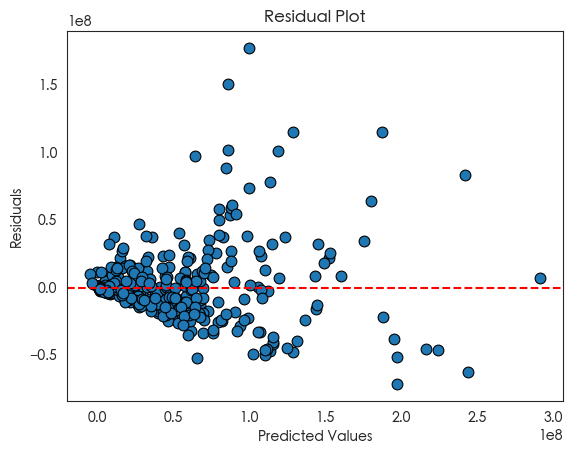

In [33]:
# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals, edgecolor='black',linewidth=0.8, s=60)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

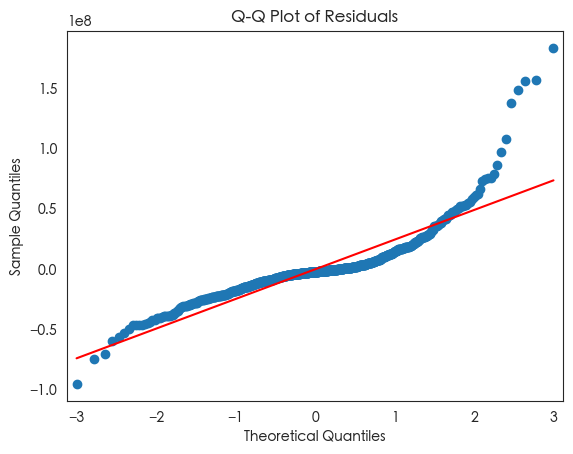

In [34]:
# Calculate the residuals using the ols_model
residuals = ols_model.resid

# Plot a Q-Q plot of the residuals
fig = sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

在高分位点出现偏移，考虑是outlier的可能

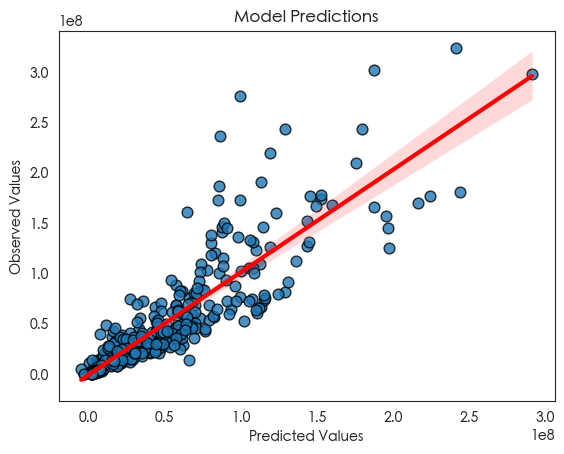

In [35]:
# Plot a regression plot of the predicted values against the true values
sns.regplot(x=y_pred,y=y_test, ci=95,
            scatter_kws={
                    'edgecolor':'black',
                    'linewidth':1,
                    's':60
                        },
           line_kws={
                    'color':'red',
                    'linewidth':3,
                })
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Model Predictions');
plt.show()

<a id="its-time-to-predict"><a/>
<h1 style="text-align:center">⚒️ 模型改进</h1>
<br>    
    
剔除系数很小的tagViews，简化模型

In [36]:
X = X.loc[:, X.columns != 'tagViews']

In [37]:
# refit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression(fit_intercept=True).fit(X_train, y_train)
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [38]:
# 模型系数及p-value
cdf = pd.DataFrame({'Coeffs':ols_model.params, 'p-values':ols_model.pvalues})
cdf['Coeffs'] = cdf['Coeffs'].apply(lambda x: "{:.2f}".format(x))
cdf['p-values'] = cdf['p-values'].apply(lambda x: "{:.2f}".format(x))

cdf

,Coeffs,p-values
const,1226773.95,0.48
authorMeta/fans,0.14,0.00
videoMeta/duration,-70497.10,0.03
shareCount,16.02,0.00
diggCount,7.85,0.00


In [39]:
# Calculate various metrics to evaluate the model's performance on the test set
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R_score = lm.score(X,y)
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1 - (1 - R_score) * (n - 1) / (n - p - 1)

arr2 = np.array([MAE, MSE, RMSE, R_score, adj_r2]).reshape(-1,5)
metrics2 = pd.DataFrame(arr2, index=['New Metrics'], columns=['MAE', 'MSE', 'RMSE', 'R-square', 'Adjusted R-square'])
# pd.concat([metrics1,metrics2]).applymap(lambda x: '{:.4f}'.format(x)) # 以浮点数表示，保留4位小数
pd.concat([metrics1,metrics2])

,MAE,MSE,RMSE,R-square,Adjusted R-square
Original Metrics,1.717210e+07,7.693062e+14,2.773637e+07,0.785099,0.784110
New Metrics,1.717210e+07,7.693062e+14,2.773637e+07,0.783155,0.782357


R^2反而变小了，剔除tagViews虽然简化了模型，但也使得模型的复杂度降低了，这可能导致了R^2的变小；也有可能是tagViews的存在稀释了其它自变量的极端异常点对模型的影响，也许可以考虑加入更多解释变量🤔

# 🧐结果与讨论
模型结果显示，视频播放次数与作者粉丝数、分享数和点赞数之间存在正相关关系，也就是说，如果一个视频的作者拥有更多的粉丝，或者视频被分享和点赞的次数越多，那么该视频的播放次数就有更大的概率增加。同时，视频时长与播放次数之间存在负相关关系，即视频时长越长，播放次数越少。这一结论可以为制定优化视频策略提供参考，例如可以考虑缩短视频时长、提高视频质量等方式以提高视频的播放次数。

尽管通过模型结果发现，作者粉丝数、标签浏览量、视频时长、分享次数和点赞次数等因素都可能会对播放次数产生影响。然而，由于模型本身存在局限性，导致模型表现不佳。主要包括以下问题：
- 常数项不显著、系数数量级差异较大以及数据中存在极端值
   - 模型中视频时长的系数数量级很大，可能是导致常系数不显著的原因
   - 由于没有画出每个自变量与因变量的线性图，无法判断是否有一些异常值是应该被剔除的，因此没有剔除异常值，可能导致了模型的不稳定性
- 本项目使用线性模型假定预测变量和结果变量之间存在线性关系，在实际情况中并不一定成立。
- 由于该数据集并没有详细的描述，该模型是使用横断面数据进行的拟合，数据是在某个特定时间点或时间段内的数据，可能导致信息间关系不完整  

为了改进模型，可以加入更多的解释变量，以更好地解释播放次数的变化；可以考虑剔除异常值，但只应该剔除那些不在趋势轴方向上的预测点；此外，还可以考虑使用非线性模型或其他统计技术来更好地捕捉变量之间的复杂关系。 

# 🎓项目总结
基于研究结果，现在回答研究目标中提出的问题：
1. 如何成为受欢迎的 TikTok 用户，如何增加 TikTok 上的粉丝数量？
   - 从可视化结果来看，增加TikTok 上的粉丝数量与用户发布的视频数量和跟观众的互动策略有很大关系。一般来说，要成为受欢迎的 TikTok 用户并增加粉丝数量，可以尝试以下方法：
     - 经常发布新视频，保持活跃度。
     - 与观众进行互动，如回复评论、与他们互动等，增加粉丝的忠诚度。
     - 优化视频内容，如创造独特和有趣的内容，使用特殊效果和创意的剪辑等，以吸引更多的观众。
<br></br>

2. 在寻求增加 TikTok 粉丝数量的方法时，需要关注哪些指标？
   - 从数据分析结果来看，以下指标对于增加 TikTok 粉丝数量很重要：
     - 视频参与度指标：播放数、点赞数，评论数等参与度指标都可以显示视频的受欢迎程度
     - 视频的观看次数和视频参与度：观看数直观地体现了视频的受欢迎程度；参与度衡量了观众对视频的兴趣和参与程度，它不仅预示了视频的影响力和传播效果，同时也为内容创作者提供了反馈和改进的方向。提升这些指标可以吸引更多的观众关注您的账号。
     - 视频的话题和标签：根据不同视频类型的参与度判断受众喜欢的视频风格，有助于获取观众兴趣，增加观众数量和粉丝数量。  
<br></br>

3. 分析视频受欢迎的潜在因素，研究如何创作受欢迎的 TikTok 视频？
   - 从模型的参数估计结果可以看出：
     - 作者的粉丝数、分享数和点赞数对播放次数具有正相关性，也就是说，这些变量的增加会导致视频的播放次数增加。这意味着，在制定社交媒体营销策略时，我们应该注重这些关键因素的提高，以增加视频的播放量。
     - 另一方面，视频时长对播放次数的影响是负相关关系，这表明如果视频时长过长，会对播放量产生负面影响。因此，在制作社交媒体视频时，要注意视频时长的控制，确保其适合受众的观看习惯。   
        <br></br>
   - 综合分析结果来看，以下几点可能会影响视频受欢迎程度：
     - 视频的长度：短视频更容易吸引观众，因为人们通常不愿意花费太长时间观看视频。
     - 视频的内容：创作让观众喜欢的独特且有趣的内容，坚持原创作品，优化视频内容和提升视频质量可以吸引更多观众的关注，提升自己的竞争力。
     - 使用流行的话题和合适的标签：这可以使视频更容易被发现，更容易获得观众的喜爱，从而增加播放量和粉丝数量。   
     
注意，虽然标签浏览量的增加会伴随着一定程度上的点赞和播放量的提高，但标签浏览量和点赞、播放量之间的相关性并不是非常强烈。因此，在视频推广过程中，对标签的使用要适度，不可过度依赖标签浏览量来提高视频的表现。
<br></br>

除了上面的内容，在适当的时间发布视频和选用当下热门音乐也可以提高视频被观看和互动的机会，从而增加粉丝数量。
   - 结合《从零开始学运营》里的知识，考虑观众所处国家情况和观众观看的时间区间，在适当的时间发布视频可以提高视频被观看和互动的机会，从而增加粉丝数量。保持视频发布的频率也有助于养成用户习惯，维系粉丝。  
   - 尝试热门挑战和使用流行的音乐使得视频更容易被发现和分享，这可能会吸引更多的观众和粉丝。


<h1 style="background-color:#FCE22A; text-align:center; vertical-align: middle; padding:10px 0; border-radius:1em">结语</h1>
<p style="font-size:16px; line-height:1.5">这是我第一个较为完整的数据分析项目，不足之处肯定是有的。因为学习这些库的时间没有很长，所以比起专业性，这个项目主要是想打磨一下自己，建立可视化素养（学习绘制美观和有数据见解的图表），培养对数据敏感的能力和熟悉数据分析需要使用的工具，如将阅读到的其它领域的知识与数据分析结合（《增长黑客里》中用北极星指标来引导产品优化的方向，使得数据分析具有针对性），熟悉numpy、pandas、matplotlib和seaborn库，学习对数据进行处理和绘制图表以及调用AxesObject的一些基本方法，熟悉机器学习的基本流程以及保证项目的连贯性和完整性。一些细节因为时间和精力的限制没有得到充分的考虑和分析，比如代码的简化，使用的模型过于简单，模型的评估部分还不够专业和严谨等等，这些都是我之后要深入学习的地方。</p>

<div style="background-color:#f07092; text-align:center; vertical-align: middle; padding:40px 0; color:#F7F7FF; border-radius:1em">
<div style="float:right; width:23%; background-color:#FCE22A; height:40px">
    <span style="line-height:50px; font-size:34px"> 🐈🐈🐈🐈🐈</span></div>
<div style="float:right; width:23%; background-color:#CDE990; height:40px">
    <span style="line-height:50px; font-size:34px"> 🐈🐈🐈🐈🐈</span></div>
    <strong style="font-size:34px">Thanks for Watching❤️</strong>